In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
target_column = "shortwave_radiation_sum (MJ/m²)"
dataset_path = './datas/riodejaneiro.csv'
shift_times = 3

### Tirando as duas primeiras linhas

In [3]:
with open(dataset_path, 'r') as ff:
    lines = ff.readlines()
    
if lines[0] != "\n":
    with open(dataset_path, 'r+') as ff:
        lines = ff.readlines()

        # move file pointer to the beginning of a file
        ff.seek(0)

        # truncate the file
        ff.truncate()

        # start writing lines except the first line
        # lines[1:] from line 2 to last line
        ff.writelines(lines[2:])
        print("entrou")

In [4]:
df = pd.read_csv(dataset_path)
df

,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h)
0,2018-01-01,26.6,19.1,27.22,4.8,10.6
1,2018-01-02,29.4,19.5,23.99,0.2,9.7
2,2018-01-03,26.8,19.7,17.71,33.3,12.9
3,2018-01-04,22.3,18.3,13.77,40.9,8.1
4,2018-01-05,21.8,17.3,9.05,17.9,5.9
...,...,...,...,...,...,...
1821,2022-12-27,24.2,18.3,12.96,13.0,13.0
1822,2022-12-28,25.0,18.7,9.87,3.3,11.4
1823,2022-12-29,22.9,18.6,11.52,20.5,8.8
1824,2022-12-30,21.3,17.3,10.68,20.6,6.6


In [5]:
columns_no_shift = list(df.columns)
columns_no_shift.remove("time")

## Shiftando o dataset para incluir dados passados

In [6]:
columns = list(df.columns)
columns.remove("time")
print(columns)
for column in columns:
    first = column.split("_")[0]
    last = column.split("_")[-1]
    last = last.split(" ")[0]
    
    df[f"{first}_{last}_lastDay"] = df[column].shift(1)
    for i in range(1, shift_times):
        df[f"{first}_{last}_{i+1}DaysBack"] = df[column].shift(i + 1)

df = df.drop(df.index[0:shift_times])
df = df.reset_index()
df = df.drop("index", axis=1)
df

['temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'windspeed_10m_max (km/h)']


,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),temperature_max_lastDay,temperature_max_2DaysBack,temperature_max_3DaysBack,temperature_min_lastDay,...,temperature_min_3DaysBack,shortwave_sum_lastDay,shortwave_sum_2DaysBack,shortwave_sum_3DaysBack,rain_sum_lastDay,rain_sum_2DaysBack,rain_sum_3DaysBack,windspeed_max_lastDay,windspeed_max_2DaysBack,windspeed_max_3DaysBack
0,2018-01-04,22.3,18.3,13.77,40.9,8.1,26.8,29.4,26.6,19.7,...,19.1,17.71,23.99,27.22,33.3,0.2,4.8,12.9,9.7,10.6
1,2018-01-05,21.8,17.3,9.05,17.9,5.9,22.3,26.8,29.4,18.3,...,19.5,13.77,17.71,23.99,40.9,33.3,0.2,8.1,12.9,9.7
2,2018-01-06,26.2,19.1,12.21,1.5,8.7,21.8,22.3,26.8,17.3,...,19.7,9.05,13.77,17.71,17.9,40.9,33.3,5.9,8.1,12.9
3,2018-01-07,20.8,18.3,7.62,24.1,8.8,26.2,21.8,22.3,19.1,...,18.3,12.21,9.05,13.77,1.5,17.9,40.9,8.7,5.9,8.1
4,2018-01-08,22.2,18.0,11.14,20.2,7.4,20.8,26.2,21.8,18.3,...,17.3,7.62,12.21,9.05,24.1,1.5,17.9,8.8,8.7,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2022-12-27,24.2,18.3,12.96,13.0,13.0,23.9,23.6,21.7,18.1,...,15.9,12.83,21.06,18.99,6.3,0.6,0.4,13.3,11.2,15.8
1819,2022-12-28,25.0,18.7,9.87,3.3,11.4,24.2,23.9,23.6,18.3,...,16.2,12.96,12.83,21.06,13.0,6.3,0.6,13.0,13.3,11.2
1820,2022-12-29,22.9,18.6,11.52,20.5,8.8,25.0,24.2,23.9,18.7,...,18.1,9.87,12.96,12.83,3.3,13.0,6.3,11.4,13.0,13.3
1821,2022-12-30,21.3,17.3,10.68,20.6,6.6,22.9,25.0,24.2,18.6,...,18.3,11.52,9.87,12.96,20.5,3.3,13.0,8.8,11.4,13.0


## Excluindo as colunas não shiftadas que não seja o alvo

In [7]:
exclude_columns = columns_no_shift.copy()
exclude_columns.remove(target_column)
df = df.drop(exclude_columns, axis=1)
df

,time,shortwave_radiation_sum (MJ/m²),temperature_max_lastDay,temperature_max_2DaysBack,temperature_max_3DaysBack,temperature_min_lastDay,temperature_min_2DaysBack,temperature_min_3DaysBack,shortwave_sum_lastDay,shortwave_sum_2DaysBack,shortwave_sum_3DaysBack,rain_sum_lastDay,rain_sum_2DaysBack,rain_sum_3DaysBack,windspeed_max_lastDay,windspeed_max_2DaysBack,windspeed_max_3DaysBack
0,2018-01-04,13.77,26.8,29.4,26.6,19.7,19.5,19.1,17.71,23.99,27.22,33.3,0.2,4.8,12.9,9.7,10.6
1,2018-01-05,9.05,22.3,26.8,29.4,18.3,19.7,19.5,13.77,17.71,23.99,40.9,33.3,0.2,8.1,12.9,9.7
2,2018-01-06,12.21,21.8,22.3,26.8,17.3,18.3,19.7,9.05,13.77,17.71,17.9,40.9,33.3,5.9,8.1,12.9
3,2018-01-07,7.62,26.2,21.8,22.3,19.1,17.3,18.3,12.21,9.05,13.77,1.5,17.9,40.9,8.7,5.9,8.1
4,2018-01-08,11.14,20.8,26.2,21.8,18.3,19.1,17.3,7.62,12.21,9.05,24.1,1.5,17.9,8.8,8.7,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2022-12-27,12.96,23.9,23.6,21.7,18.1,16.2,15.9,12.83,21.06,18.99,6.3,0.6,0.4,13.3,11.2,15.8
1819,2022-12-28,9.87,24.2,23.9,23.6,18.3,18.1,16.2,12.96,12.83,21.06,13.0,6.3,0.6,13.0,13.3,11.2
1820,2022-12-29,11.52,25.0,24.2,23.9,18.7,18.3,18.1,9.87,12.96,12.83,3.3,13.0,6.3,11.4,13.0,13.3
1821,2022-12-30,10.68,22.9,25.0,24.2,18.6,18.7,18.3,11.52,9.87,12.96,20.5,3.3,13.0,8.8,11.4,13.0


## Separando treino e teste

In [8]:
df_test = df.iloc[-341:]
df_train = df.drop(df.index[-341:])
df_test.reset_index(inplace=True, drop=True)
df_test.head()

,time,shortwave_radiation_sum (MJ/m²),temperature_max_lastDay,temperature_max_2DaysBack,temperature_max_3DaysBack,temperature_min_lastDay,temperature_min_2DaysBack,temperature_min_3DaysBack,shortwave_sum_lastDay,shortwave_sum_2DaysBack,shortwave_sum_3DaysBack,rain_sum_lastDay,rain_sum_2DaysBack,rain_sum_3DaysBack,windspeed_max_lastDay,windspeed_max_2DaysBack,windspeed_max_3DaysBack
0,2022-01-25,27.47,28.4,27.6,26.3,18.1,17.9,17.9,29.04,31.29,26.90,0.0,0.0,0.0,11.3,11.3,12.9
1,2022-01-26,28.75,27.7,28.4,27.6,18.4,18.1,17.9,27.47,29.04,31.29,0.0,0.0,0.0,10.8,11.3,11.3
2,2022-01-27,26.77,30.0,27.7,28.4,18.1,18.4,18.1,28.75,27.47,29.04,0.7,0.0,0.0,13.1,10.8,11.3
3,2022-01-28,23.36,30.9,30.0,27.7,20.9,18.1,18.4,26.77,28.75,27.47,0.0,0.7,0.0,16.4,13.1,10.8
4,2022-01-29,16.54,29.5,30.9,30.0,20.7,20.9,18.1,23.36,26.77,28.75,6.2,0.0,0.7,10.2,16.4,13.1


In [9]:
df_train

,time,shortwave_radiation_sum (MJ/m²),temperature_max_lastDay,temperature_max_2DaysBack,temperature_max_3DaysBack,temperature_min_lastDay,temperature_min_2DaysBack,temperature_min_3DaysBack,shortwave_sum_lastDay,shortwave_sum_2DaysBack,shortwave_sum_3DaysBack,rain_sum_lastDay,rain_sum_2DaysBack,rain_sum_3DaysBack,windspeed_max_lastDay,windspeed_max_2DaysBack,windspeed_max_3DaysBack
0,2018-01-04,13.77,26.8,29.4,26.6,19.7,19.5,19.1,17.71,23.99,27.22,33.3,0.2,4.8,12.9,9.7,10.6
1,2018-01-05,9.05,22.3,26.8,29.4,18.3,19.7,19.5,13.77,17.71,23.99,40.9,33.3,0.2,8.1,12.9,9.7
2,2018-01-06,12.21,21.8,22.3,26.8,17.3,18.3,19.7,9.05,13.77,17.71,17.9,40.9,33.3,5.9,8.1,12.9
3,2018-01-07,7.62,26.2,21.8,22.3,19.1,17.3,18.3,12.21,9.05,13.77,1.5,17.9,40.9,8.7,5.9,8.1
4,2018-01-08,11.14,20.8,26.2,21.8,18.3,19.1,17.3,7.62,12.21,9.05,24.1,1.5,17.9,8.8,8.7,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2022-01-20,26.45,28.6,30.1,28.5,19.8,20.3,19.0,27.57,26.31,28.12,1.3,1.0,0.0,10.2,10.8,11.7
1478,2022-01-21,24.79,27.2,28.6,30.1,19.3,19.8,20.3,26.45,27.57,26.31,0.4,1.3,1.0,11.3,10.2,10.8
1479,2022-01-22,26.90,25.9,27.2,28.6,18.6,19.3,19.8,24.79,26.45,27.57,0.7,0.4,1.3,12.6,11.3,10.2
1480,2022-01-23,31.29,26.3,25.9,27.2,17.9,18.6,19.3,26.90,24.79,26.45,0.0,0.7,0.4,12.9,12.6,11.3


## Separando X e Y

In [10]:
time = df_train["time"]
time = pd.DataFrame(time)
Y_train = df_train[target_column]
X_train = df_train.drop(["time", target_column], axis=1)


time_test = df_test["time"]
time_test = pd.DataFrame(time_test)
Y_test = df_test[target_column]
X_test = df_test.drop(["time", target_column], axis=1)

Y_train

0       13.77
1        9.05
2       12.21
3        7.62
4       11.14
        ...  
1477    26.45
1478    24.79
1479    26.90
1480    31.29
1481    29.04
Name: shortwave_radiation_sum (MJ/m²), Length: 1482, dtype: float64

## Treinando

In [11]:
rgs = LinearRegression()

rgs = rgs.fit(X_train, Y_train)

## Validando

In [12]:
y_pred = rgs.predict(X_test)

In [13]:
y_pred = list(y_pred)
if target_column == "rain_sum (mm)":
    y_pred = [0.0 if yi < 0 else yi for yi in y_pred]

## Pegando a previsão desejada

In [14]:
time_test["predictions"] = pd.Series(list(y_pred))
time_test["real_value"] = Y_test
prediction_desired = float(time_test.loc[time_test["time"] == "2022-12-30", "predictions"])
real_value = float(time_test.loc[time_test["time"] == "2022-12-30", "real_value"])
prediction_desired

13.078941998556129

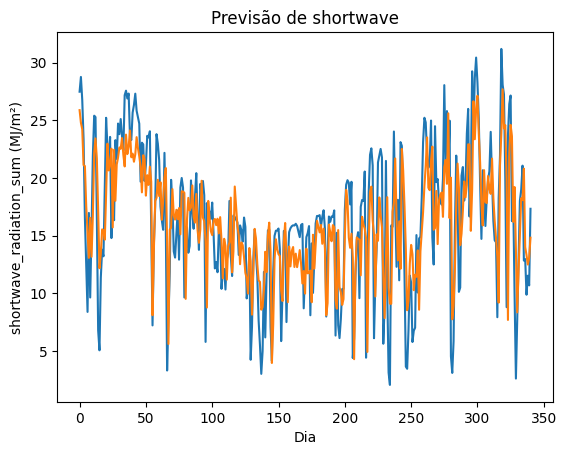

In [15]:
import matplotlib.pyplot as plt

plt.xlabel('Dia')
plt.ylabel(target_column)
plt.title(f'Previsão de {target_column.split("_")[0]}')
plt.plot(list(X_test.index), list(Y_test))
plt.plot(list(X_test.index), y_pred)

In [16]:
def rmse(y_predicted, y_real):
    return (sum((y_predicted - y_real)**2)/len(y_real))**0.5
rmse(y_pred, Y_test)

4.340124417845421